In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import math
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [ ]:
df = pd.read_csv('commodity_futures.csv')
df

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
5864,2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
5865,2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25
5866,2022-09-22,7.089,1671.4,83.49,90.46,1457.00,688.25,3.4985,19.548,1006.25,...,3123.75,341.15,24502.0,910.75,18.49,251.57,223.55,94.125,979.50,96.83


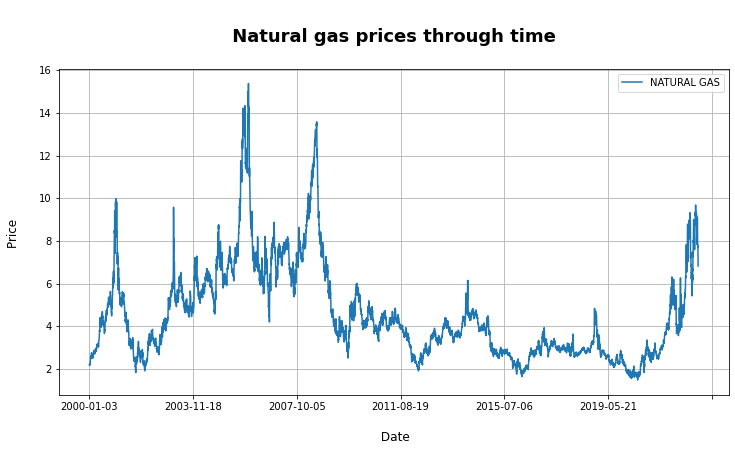

In [ ]:
df.plot(x ='Date', y='NATURAL GAS', kind = 'line', figsize=(12,6), grid = True)
plt.title("\n Natural gas prices through time \n", fontsize=18, fontweight='bold')
plt.xlabel('\n Date', fontsize=12)
plt.ylabel('Price \n', fontsize=12)
plt.show()

In [ ]:
df.set_index('Date', inplace=True)
df

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,145.725,...,3165.75,331.08,24556.0,830.50,17.69,246.41,224.05,96.475,909.75,97.54
2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,146.300,...,3146.25,337.22,24918.0,893.75,18.19,244.78,228.10,95.975,963.00,93.54
2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,145.875,...,3114.50,333.38,24894.0,903.75,18.22,248.65,221.30,94.425,967.00,97.25


In [ ]:
data = df[['NATURAL GAS']]
data.isna().sum()

NATURAL GAS    1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
print('\n------- DATAFRAME -------\n\n', data)
print('\n\n------- ABOUT DATA ------- \n\n', data.describe())


------- DATAFRAME -------

             NATURAL GAS
Date                   
2000-01-04        2.176
2000-01-05        2.168
2000-01-06        2.196
2000-01-07        2.173
2000-01-10        2.216
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[5867 rows x 1 columns]


------- ABOUT DATA ------- 

        NATURAL GAS
count  5867.000000
mean      4.544450
std       2.243106
min       1.482000
25%       2.870000
50%       3.925000
75%       5.676000
max      15.378000


In [ ]:
data = data.iloc[5137:] #5502
data

,NATURAL GAS
Date,
2019-11-29,2.281
2019-12-02,2.329
2019-12-03,2.441
2019-12-04,2.399
2019-12-05,2.427
...,...
2022-09-19,7.752
2022-09-20,7.717
2022-09-21,7.779


In [ ]:
print('\n------- DATAFRAME -------\n\n', data)
print('\n\n------- ABOUT DATA ------- \n\n', data.describe(include ='all'))


------- DATAFRAME -------

             NATURAL GAS
Date                   
2019-11-29        2.281
2019-12-02        2.329
2019-12-03        2.441
2019-12-04        2.399
2019-12-05        2.427
...                 ...
2022-09-19        7.752
2022-09-20        7.717
2022-09-21        7.779
2022-09-22        7.089
2022-09-23        6.821

[730 rows x 1 columns]


------- ABOUT DATA ------- 

        NATURAL GAS
count   730.000000
mean      3.880682
std       2.113355
min       1.482000
25%       2.298250
50%       2.974500
75%       4.983500
max       9.680000


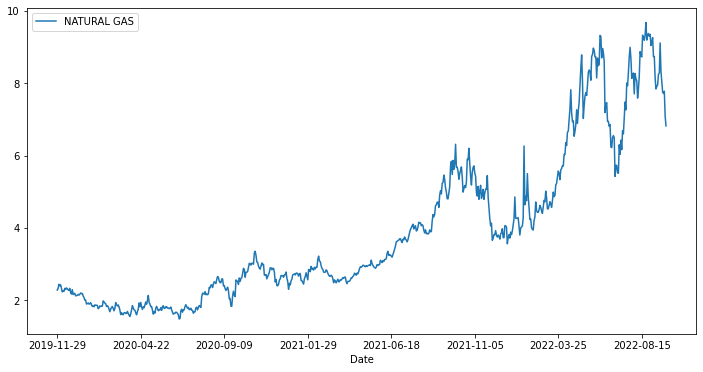

In [ ]:
data[:5502].plot(figsize=(12,6)) 

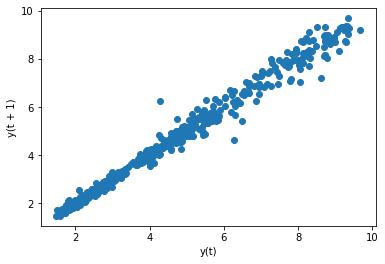

In [ ]:
lag_plot(data)
plt.show()

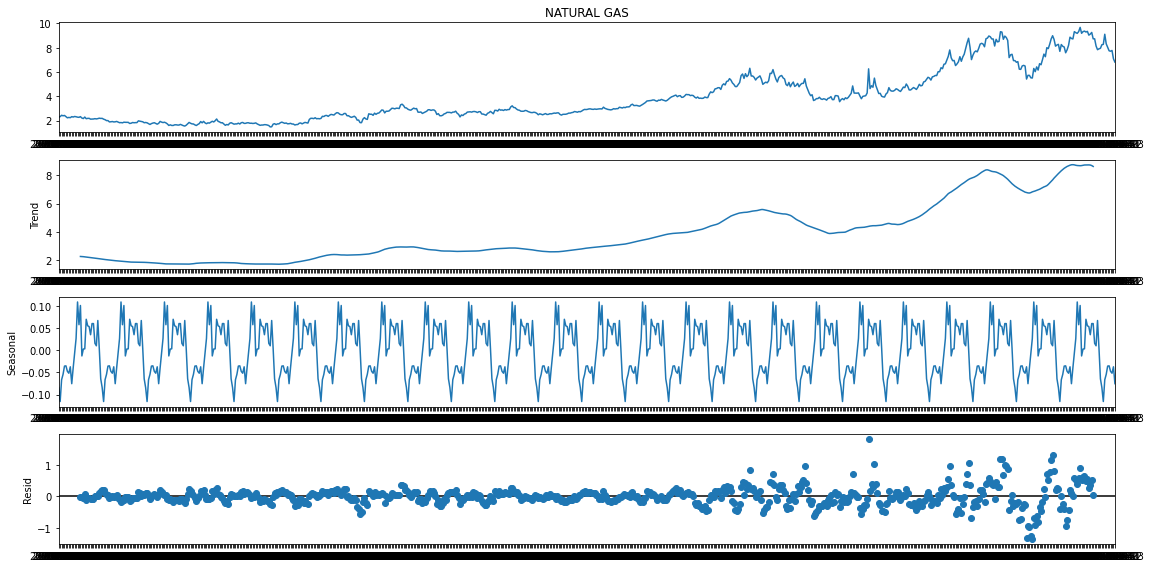

In [ ]:
sd = seasonal_decompose(data['NATURAL GAS'],  period = 30)

fig =sd.plot()
fig.set_size_inches((16,8))
fig.tight_layout()
plt.show()

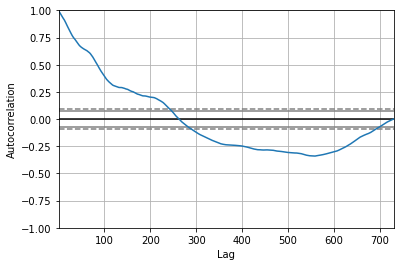

In [ ]:
autocorrelation_plot(data) #correlaton of the whole dataset
plt.show()

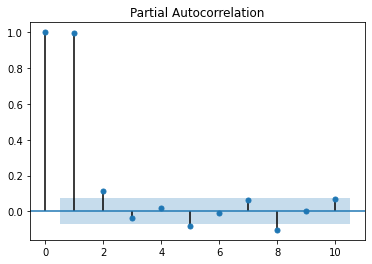

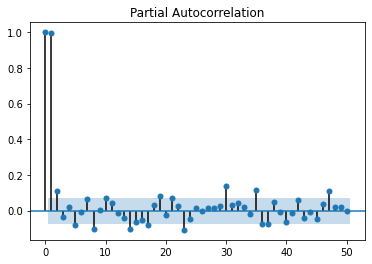

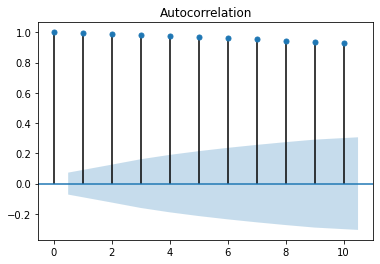

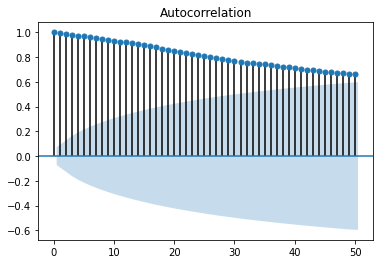

In [ ]:
pacf = plot_pacf(data['NATURAL GAS'], lags=10)
pacf2 = plot_pacf(data['NATURAL GAS'], lags=50)
acf = plot_acf(data['NATURAL GAS'], lags=10)
acf2 = plot_acf(data['NATURAL GAS'], lags=50)

In [ ]:
data_test = adfuller(data['NATURAL GAS'], autolag = 'AIC')

print("1. ADF : ", data_test[0])
print("2. P-Value : ", data_test[1])
print("3. Number of Lags : ", data_test[2])
print("4. Number of observations used for ADF regression and critical values calculation :", data_test[3])
print("5. Critical Values :")


for key, val in data_test[4].items():
  print("\t",key, ":", val)


if (data_test[1] < 0.05) and (data_test[0] < data_test[4]['5%']):
        print(' \n\n The H0 hypothesis was rejected. The series is stationary')
else:
        print(' \n\n Failed to reject the H0 hypothesis. The series is NOT stationary')

1. ADF :  -0.7963233326992363
2. P-Value :  0.8201996758095383
3. Number of Lags :  6
4. Number of observations used for ADF regression and critical values calculation : 723
5. Critical Values :
	 1% : -3.4394269973845657
	 5% : -2.8655458544300387
	 10% : -2.568903174551249
 

 Failed to reject the H0 hypothesis. The series is NOT stationary


In [ ]:
datadiff= pd.DataFrame() 
datadiff['First Difference'] = data['NATURAL GAS'] - data['NATURAL GAS'].shift(1)

In [ ]:
datadiff = datadiff.dropna()

In [ ]:
print('\n------- DATAFRAME -------\n\n', datadiff)
print('\n\n------- ABOUT DATA ------- \n\n', datadiff.describe(include ='all'))


------- DATAFRAME -------

             First Difference
Date                        
2019-12-02             0.048
2019-12-03             0.112
2019-12-04            -0.042
2019-12-05             0.028
2019-12-06            -0.093
...                      ...
2022-09-19            -0.277
2022-09-20            -0.035
2022-09-21             0.062
2022-09-22            -0.690
2022-09-23            -0.268

[729 rows x 1 columns]


------- ABOUT DATA ------- 

        First Difference
count        729.000000
mean           0.006228
std            0.228594
min           -1.626000
25%           -0.058000
50%            0.001000
75%            0.076000
max            1.988000


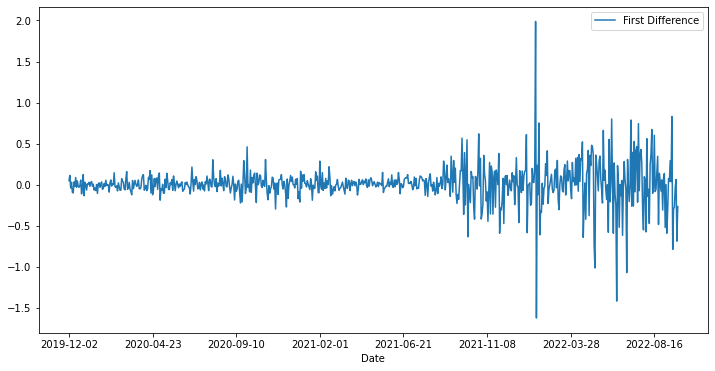

In [ ]:
datadiff.plot(figsize=(12,6)) 

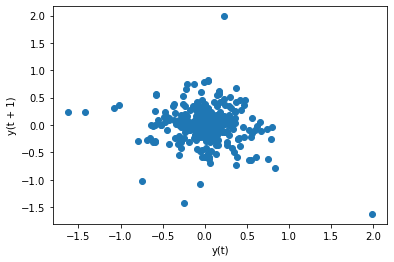

In [ ]:
lag_plot(datadiff)
plt.show()

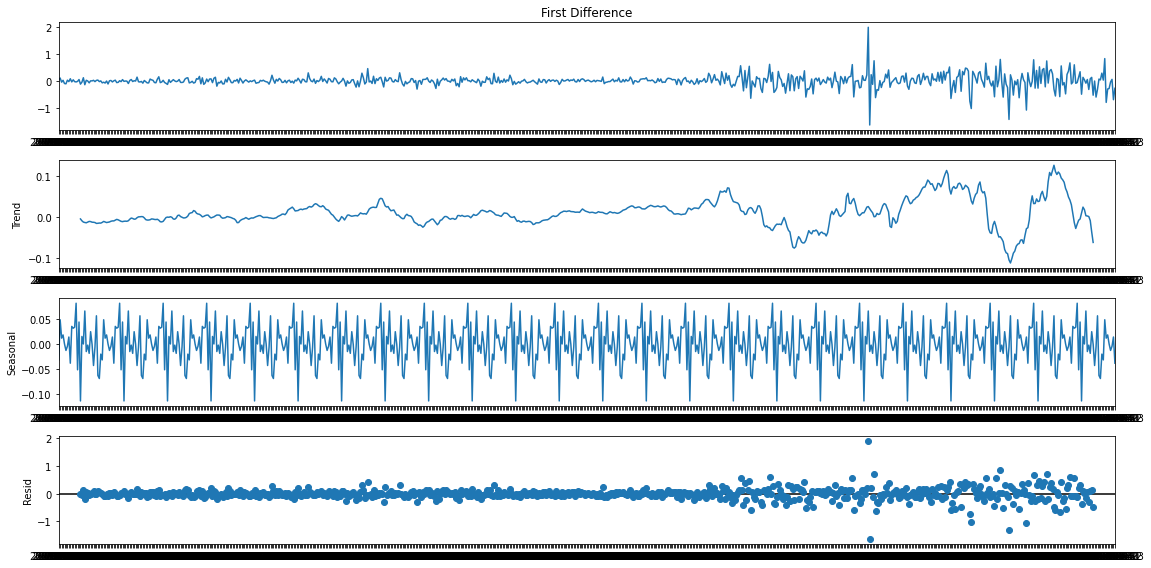

In [ ]:
sd = seasonal_decompose(datadiff['First Difference'], period = 30)

fig =sd.plot()
fig.set_size_inches((16,8))
fig.tight_layout()
plt.show()

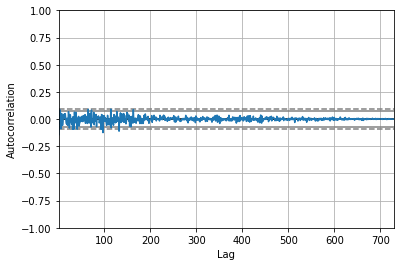

In [ ]:
autocorrelation_plot(datadiff)
plt.show()

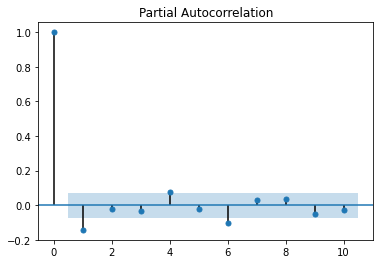

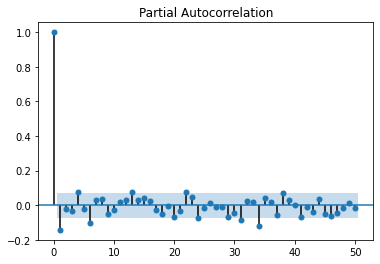

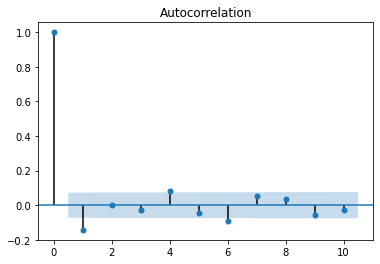

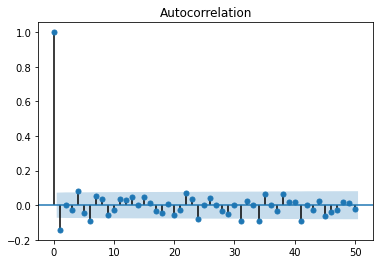

In [ ]:
pacf = plot_pacf(datadiff['First Difference'], lags=10)
pacf2 = plot_pacf(datadiff['First Difference'], lags=50)
acf = plot_acf(datadiff['First Difference'], lags=10)
acf2 = plot_acf(datadiff['First Difference'], lags=50)

In [ ]:
data_test2 = adfuller(datadiff['First Difference'], autolag = 'AIC')

print("1. ADF : ", data_test2[0])
print("2. P-Value : ", data_test2[1])
print("3. Number of Lags : ", data_test2[2])
print("4. Number of observations used for ADF regression and critical values calculation :", data_test2[3])
print("5. Critical Values :")


for key, val in data_test2[4].items():
  print("\t",key, ":", val)


if (data_test2[1] < 0.05) and (data_test2[0] < data_test2[4]['5%']):
        print(' \n\n The H0 hypothesis was rejected. The series is stationary')
else:
        print(' \n\n Failed to reject the H0 hypothesis. The series is NOT stationary')

1. ADF :  -12.070753413413884
2. P-Value :  2.3509043655905103e-22
3. Number of Lags :  5
4. Number of observations used for ADF regression and critical values calculation : 723
5. Critical Values :
	 1% : -3.4394269973845657
	 5% : -2.8655458544300387
	 10% : -2.568903174551249
 

 The H0 hypothesis was rejected. The series is stationary


In [ ]:
values = datadiff.values
train = values[:len(values) - 5]
test = values[len(values)-5:]

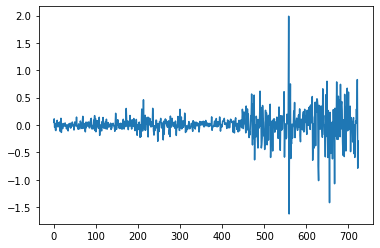

In [ ]:
plt.plot(train)

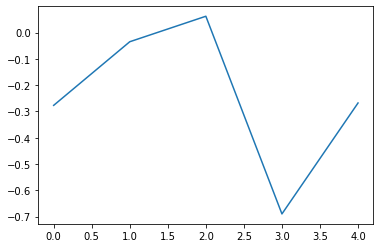

In [ ]:
plt.plot(test)

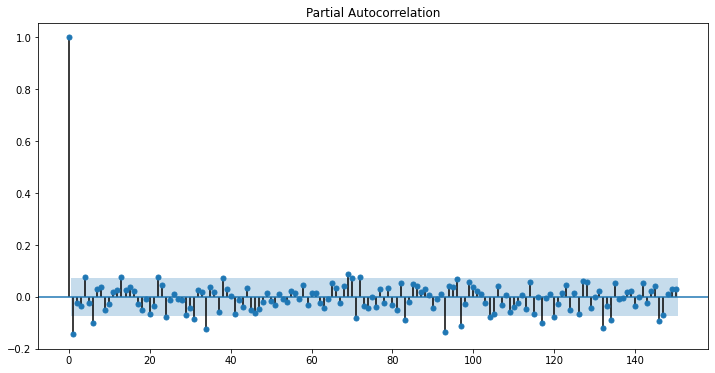

In [ ]:
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    plot_pacf(datadiff['First Difference'], lags=150)

In [ ]:
model = AutoReg(train, lags=[1,6,24,31,34,93,97,105,117,132], old_names = False) 
model = model.fit()

In [ ]:
print(model.summary())

                             AutoReg Model Results                             
Dep. Variable:                       y   No. Observations:                  724
Model:             Restr. AutoReg(132)   Log Likelihood                  26.068
Method:                Conditional MLE   S.D. of innovations              0.232
Date:                 Thu, 10 Nov 2022   AIC                             -2.885
Time:                         13:18:31   BIC                             -2.797
Sample:                            132   HQIC                            -2.851
                                   724                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0234      0.010      2.430      0.015       0.005       0.042
y.L1          -0.1506      0.038     -3.918      0.000      -0.226      -0.075
y.L6          -0.1057      0.039     -2.687 

In [ ]:
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic = False)

In [ ]:
for i in range(len(predictions)):
  print('predicted = %.3f     expected = %.3f' % (predictions[i], test[i]))
  print('-' * 40)

rmse = math.sqrt(mean_squared_error(test, predictions))
print('\n               RMSE: %.3f' %rmse)

predicted = -0.062     expected = -0.277
----------------------------------------
predicted = -0.038     expected = -0.035
----------------------------------------
predicted = 0.225     expected = 0.062
----------------------------------------
predicted = -0.258     expected = -0.690
----------------------------------------
predicted = -0.083     expected = -0.268
----------------------------------------

               RMSE: 0.242


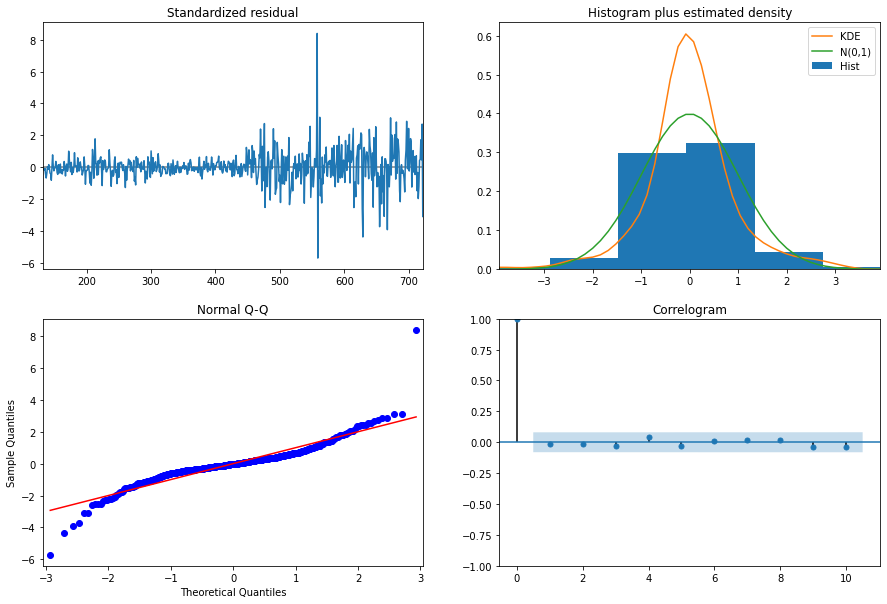

In [79]:
model.plot_diagnostics(figsize=(15,10))
plt.show()

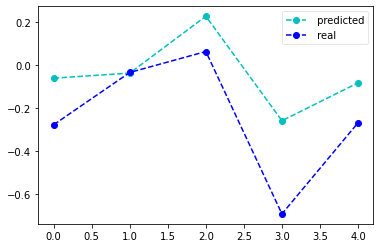

In [91]:
plt.plot(predictions,'--o', color='c', label=' predicted') 
plt.plot(test,'--o',color='b', label=' real') 
leg= plt.legend(loc='best', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()